# Connect Intensive - Machine Learning Nanodegree
# Lesson 07: Feature Selection

## Objectives
  - Define the Chi-Squared $(\chi^2)$ test-statistic and Pearson's Chi-Squared Test
  - Perform univariate feature selection using <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html">the `SelectKBest` class</a> from `sklearn`.
  - Perform recursive feature elimination (RFE) using <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html">the `RFE` class</a> from `sklearn`.
  - Determine the optimal number of features to retain using RFE with cross-validation (RFECV) and <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html">the `RFECV` class</a> from `sklearn`.
  
## Prerequisites
  - You should have the following python packages installed:
    - [matplotlib](http://matplotlib.org/index.html)
    - [numpy](http://www.scipy.org/scipylib/download.html)
    - [pandas](http://pandas.pydata.org/getpandas.html)
    - [sklearn](http://scikit-learn.org/stable/install.html)

## Getting Started
As usual, we start by importing some useful libraries and modules. Don't worry if you get a warning message when importing `matplotlib` -- it just needs to build the font cache, and the warning is just to alert you that this may take a while the first time the cell is run.

**Run** the cell below to import useful libraries for this notebook.

In [1]:
%matplotlib inline
try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")

    
try:
    import matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")

    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

    
try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")
    
try:
    import sklearn
    print("Successfully imported sklearn! (Version {})".format(sklearn.__version__))
    skversion = int(sklearn.__version__[2:4])
except ImportError:
    print("Could not import sklearn!")

/Users/nick/Library/Python/2.7/lib/python/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Successfully imported numpy! (Version 1.11.2)
Successfully imported matplotlib.pyplot! (Version 1.5.3)
Successfully imported pandas! (Version 0.19.1)
Successfully imported display from IPython.display!
Successfully imported sklearn! (Version 0.18.1)


## The Mushroom Data Set
The [UCI Machine Learning Repository (MLR)](https://archive.ics.uci.edu/ml/index.html) maintains datasets as a service to the machine learning community. One of those datasets is the [Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/Mushroom), drawn from **The Audubon Society Field Guide to North American Mushrooms** *(1981)*. There are 8124 instances in the dataset, with 22 categorical features that can be used to predict whether a mushroom is edible or poisonous. The data set information from the UCI MLR is as follows:
> *"This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy."*

The first column in the dataset is the **edible** feature, describing whether a mushroom is (e)dible or (p)oisonous.

The remaining 22 columns in the dataset correspond to the following 22 features that describe the mushrooms:
  1. **cap-shape:** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
  2. **cap-surface:** fibrous=f, grooves=g, scaly=y, smooth=s
  3. **cap-color:** brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
  4. **bruises:** bruises=t, no=f
  5. **odor:** almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
  6. **gill-attachment:** attached=a, descending=d, free=f, notched=n
  7. **gill-spacing:** close=c, crowded=w, distant=d
  8. **gill-size:** broad=b, narrow=n
  9. **gill-color:** black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
  10. **stalk-shape:** enlarging=e, tapering=t
  11. **stalk-root:** bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
  12. **stalk-surface-above-ring:** fibrous=f, scaly=y, silky=k, smooth=s
  13. **stalk-surface-below-ring:** fibrous=f, scaly=y, silky=k, smooth=s
  14. **stalk-color-above-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  15. **stalk-color-below-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
  16. **veil-type:** partial=p, universal=u
  17. **veil-color:** brown=n, orange=o, white=w, yellow=y
  18. **ring-number:** none=n, one=o, two=t
  19. **ring-type:** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
  20. **spore-print-color:** black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
  21. **population:** abundant=a, clustered=c, numerous=n,scattered=s, several=v, solitary=y
  22. **habitat:** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

**Run** the cell below to read the mushroom data from the UCI MLR into a `pandas` `DataFrame` object:

In [2]:
mush_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mush_names = ["edible","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment",\
         "gill-spacing","gill-size","gill-color","stalk-shape","stalk-root",\
         "stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring",\
         "stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type",\
         "spore-print-color","population","habitat"]

mush_df = pd.read_csv(mush_url, names=mush_names, header=None)

display(mush_df.head())

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


There are 22 categorical features in the mushroom data, but if we get the indicator variables (dummy variables) for each of the categorical features (using either [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) or [`sklearn.preprocessing.OneHotEncoder()`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), there will be even more features to choose from, leaving us victims to the curse of dimensionality. This lesson covers some techniques to reduce the dimensionality of the problem, so that we'll be victims no more!

To start, we'll need to cover the Chi-Squared test, which is one way to determine the predictive power for a given feature -- namely, how likely are two features to be independent?

## Contingency Tables and Pearson's Chi-Squared Test

We'll step away from the UCI MLR mushroom dataset for a bit to deal with simpler numbers for this example. Suppose we have a collection 100 mushrooms. Half of these mushrooms (50) have bruises, and half (50) do not. Also, half of these mushrooms (50) are **edible** and half (50) are **poisonous**. A [**contingency table**](https://en.wikipedia.org/wiki/Contingency_table) (also known as a **cross tabulation** or **crosstab**) is a matrix that displays the *multivariate* frequency distribution of the variables. Below is one possible **observed** contingency table:

| **edible**  | **e** | **p** | 
|-------------|-------|-------| 
| **bruises** |       |       |
| **f**       |    20 |    30 | 
| **t**       |    30 |    20 |

The **columns** of this contingency table correspond to edible (**e**) and poisonous (**p**) mushrooms, respectively. The **rows** correspond to the absence (**f**) or presence (**t**) of bruises on the mushroom, respectively. In this example, there are 20 edible mushrooms without bruises and 30 edible mushrooms with bruises. There are 30 poisonous mushrooms without bruises and 20 poisonous mushrooms with bruises.

We might be wondering, based on the observed contingency table above, are these two features (edible and bruises) *independent*? [Pearson's Chi-Squared Test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) is one way to predict how likely is the hypothesis that two features are independent. First, we need to compute the **expected** or **theoretical** contingency table for independent features. For example, what frequency of edible mushrooms with bruises would we expect from a set of 100 mushrooms where 50 are edible and 50 have bruises? We could compute this as follows:

$$ \begin{array}{c}\text{Theoretical}\\\text{frequency of}\\\text{edible mushrooms}\\\text{with bruises}\end{array} = \left(\begin{array}{c}\text{Probability of}\\\text{mushroom being}\\\text{edible}\end{array}\right) \times \left(\begin{array}{c}\text{Probability of}\\\text{mushroom having}\\\text{bruises}\end{array}\right) \times
\left(\begin{array}{c}\text{Total}\\\text{number of}\\\text{mushrooms}\end{array}\right)=\left(\frac{50}{100}\right)\left(\frac{50}{100}\right)\left(\vphantom{\frac{50}{100}}100\right)=\boxed{\ 25\ }$$

We can repeat this calculation for each entry in the contingency table to arrive at the **theoretical** or **expected** contingency table:

| **edible**  | **e** | **p** | 
|-------------|-------|-------| 
| **bruises** |       |       |
| **f**       |    25 |    25 | 
| **t**       |    25 |    25 |

Now that we have the observed and expected frequencies, we can compute $\chi^2$, the test-statistic:

$$\boxed{\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}}$$

Where we have introduced the following symbols:
  - $\chi^2$ is Pearson's cumulative test-statistic, which asymptotically approaches a [$\chi^2$ distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)
  - $n$ is the number of cells in the contingency table (in our example, $n=4$)
  - $E_i$ is the **expected** or **theoretical** frequency for the $i^{\text{th}}$ cell of the contingency table.
  - $O_i$ is the **observed** or **actual** frequency for the $i^{\text{th}}$ cell of the contingency table.
  
The value of our $\chi^2$ test-statistic is computed as follows:

$$\chi^2=\frac{\left(25-20\right)^2}{25}+\frac{\left(25-30\right)^2}{25}+\frac{\left(25-30\right)^2}{25}+\frac{\left(25-20\right)^2}{25}=4$$

To determine whether a $\chi^2$ test-statistic is statistically significant, we will also need to compute the <a href="https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)">**degrees of freedom**</a>, typically abbreviated as DoF or dof. For a feature with $N$ distinct classes, there are $N-1$ DoF. For example, there are 2 classes for the **bruises** feature: **t** or **f**, and hence only 1 DoF. To get the total DoF from multiple features, simply multiply the DoF for each feature: in our example, there is 1 DoF from the **bruises** feature and 1 DoF from the **edible** feature. The total DoF is simply $1\times1=1$.

Now we can compute the <a href="https://en.wikipedia.org/wiki/P-value">**p-value**</a> of the test-statistic $\chi^2=4$ with 1 DoF, which is equal to 1 minus the **cumulative distribution function** ([`chi2.cdf` from the `scipy` package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)). **Run** the cell below to do so:

In [3]:
# We will use the cumulative distribution function (cdf) and
# probability density function (pdf) for the chi2 distribution:
from scipy.stats import chi2 as stats_chi2

print("The p value with chi-squared of {:.2f} and {} DoF is {:.3f}"\
      .format(4,1,1-stats_chi2.cdf(4,1)))

The p value with chi-squared of 4.00 and 1 DoF is 0.046


We see that we get a p-value of 0.046. That means that there is a 4.6% chance of observing a **bruises** and **edible** contingency table deviating at least as far from the expected contingency table as the one above, given the null hypothesis that the two features are independent. The larger the $\chi^2$ test-statistic is for a contingency table, the lower the resulting p-value and the less likely that two features are independent. However, the critical $\chi^2$ test-statistic is dependent on the DoF.

**Run** the cell below to visualize the $\chi^2$ distribution for different DoF.

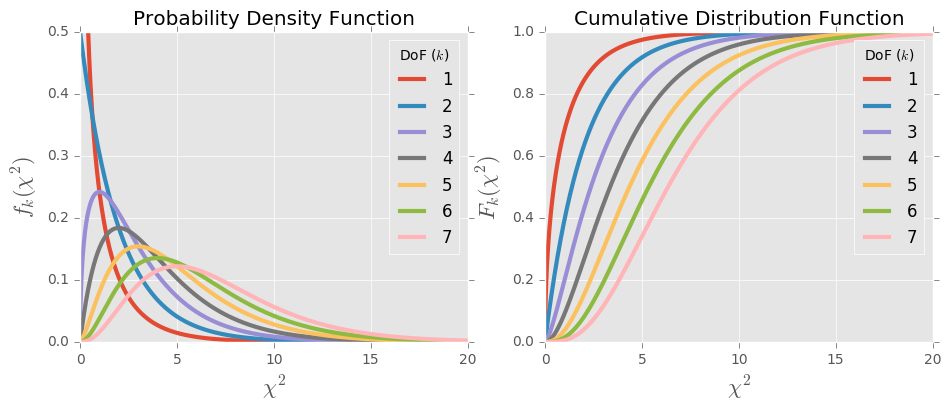

In [4]:
# Initialize figure and axes:
fig, axarr = plt.subplots(1,2)

# With two subplots, we want a wider figure aspect ratio:
fig.set_size_inches(11,4)

# Plot the pdf and cdf for the chi2 distribution for several DoF:
x = np.linspace(0,20,1e3)
for df in np.arange(1,8):
    # probability density function on first axis:
    axarr[0].plot(x, stats_chi2.pdf(x,df), label=df, lw=3)
    # cumulative distribution function on second axis:
    axarr[1].plot(x, stats_chi2.cdf(x,df), label=df, lw=3)
    
# Set the y limits for each axis separately:
ylim = axarr[0].set_ylim([0,0.5])
ylim = axarr[1].set_ylim([0,1])

# Add a legend to each axis showing the DoF:
axarr[0].legend(title="DoF ($k$)")
axarr[1].legend(title="DoF ($k$)")

# Set the title and axes labels for each axis
title   = axarr[0].set_title("Probability Density Function")
title   = axarr[1].set_title("Cumulative Distribution Function")
x_label = axarr[0].set_xlabel("$\chi^2$", fontsize=16)
x_label = axarr[1].set_xlabel("$\chi^2$", fontsize=16)
y_label = axarr[0].set_ylabel("$f_k(\chi^2)$", fontsize=16)
y_label = axarr[1].set_ylabel("$F_k(\chi^2)$", fontsize=16)

We see that the probability density function (pdf) for the $\chi^2$ distribution broadens and flattens as we increase the DoF, meaning larger $\chi^2$ test-statistics become more common with increasing DoF.

## Performing a Chi-Squared Test with `pandas`

We can perform the statistical analysis explained above using `pandas`. First, let's make a contingency table from the UCI MLR Mushroom dataset for the `'bruises'` and `'edible'` features, using [the method `pandas.crosstab()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html). **Run** the cell below to create a contingency table from the Mushroom dataset. We will store the contingency table into the `DataFrame` object `bruises_obs` (for observed).

In [5]:
# Make a contingency table
bruises_obs = pd.crosstab(mush_df['bruises'],mush_df['edible'])
print("Observed Frequencies:")
display(bruises_obs)

Observed Frequencies:


edible,e,p
bruises,,
f,1456,3292
t,2752,624


Now we have the **observed** contingency table. We next need the **expected** frequency, assuming the `'bruised'` and `'edible'` features are independent. We can do this using an [outer product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) of two `numpy` arrays: the `'bruises'` frequencies and the `'edible'` frequencies, normalized by the total number of observations. **Run** the cell below to compute the theoretical frequencies, storing the result into the `DataFrame` object `bruises_exp` (for expected). Note: we're displaying the expected frequencies rounded to the nearest integer, but they are stored in the `DataFrame` object `bruises_exp` as floats)

In [6]:
bruises_exp = pd.DataFrame(np.outer(bruises_obs.sum(axis=1),bruises_obs.sum(axis=0))\
                           *1.0 / bruises_obs.sum().sum(),\
                            index = bruises_obs.index,\
                            columns = bruises_obs.columns)
print("Expected Frequencies (assuming feature independence):")
display(bruises_exp.round(0).astype('int64'))

Expected Frequencies (assuming feature independence):


edible,e,p
bruises,,
f,2459,2289
t,1749,1627


Now we can compute our $\chi^2$ statistic using `bruises_obs` and `bruises_exp`. Recall the formula for $\chi^2$:

$$\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}$$

and also recall the definitions of all the symbols:
  - $\chi^2$ is Pearson's cumulative test statistic, which asymptotically approaches a $\chi^2$ distribution
  - $n$ is the number of cells in the contingency table
  - $E_i$ is the **expected** or **theoretical** frequency of the $i^{\text{th}}$ cell of the contingency table.
  - $O_i$ is the **observed** or **actual** frequency of the $i^{\text{th}}$ cell of the contingency table.
  
**Run** the cell below to compute the $\chi^2$ test-statistic and the corresponding p-value:

In [7]:
bruises_chi2 = ((bruises_exp - bruises_obs).apply(lambda x: x**2) / bruises_exp).sum().sum()
print("The chi2 test-statistic is {:.2f}.".format(bruises_chi2))
print("The p-value for this chi2 is {:.4e}.".format(1-stats_chi2.cdf(bruises_chi2,df=1)))

The chi2 test-statistic is 2043.45.
The p-value for this chi2 is 0.0000e+00.


The p-value, or the likelihood of `'edible'` and `'bruises'` being independent features, is practically zero! It's very unlikely that the features are independent, and so there's likely useful predictive power in the `'bruises'` feature. But is it the feature with the *most* predictive power? We'll see in the next section how `sklearn` can use the $\chi^2$ test-statistic to determine the most useful features to retain. But before we do, let's do some exercises to practice what we've covered so far.

# Exercises
You may want to consult the above code cells while working through these exercises.
## Question 1
Make a contingency table using `pandas.crosstab()` for the `'stalk-shape'` and `'edible'` features, and store the resulting `DataFrame` object into the variable `stalk_obs`. The `'stalk-shape'` feature has two categories: (**e**)nlarging and (**t**)apering. How many (**p**)oisonous mushrooms have an (**e**)nlarging stalk shape? How many (**e**)dible mushrooms have a (**t**)apering stalk shape?

In [8]:
# Make a contingency table
stalk_obs = pd.crosstab(mush_df['stalk-shape'],mush_df['edible'])
print("Observed Frequencies:")
display(stalk_obs)

Observed Frequencies:


edible,e,p
stalk-shape,,
e,1616,1900
t,2592,2016


## Question 2

Here, we will use the contingency table `stalk_obs` from the previous question.
  - What does `stalk_obs.sum(axis=0)` compute?
  - What does `stalk_obs.sum(axis=1)` compute?
  - What does `stalk_obs.sum().sum()` compute?

In [9]:
print('.sum(axis=0):')
display(stalk_obs.sum(axis=0))
print('\n.sum(axis=1):')
display(stalk_obs.sum(axis=1))
print('\n.sum().sum():')
display(stalk_obs.sum().sum())

.sum(axis=0):


edible
e    4208
p    3916
dtype: int64


.sum(axis=1):


stalk-shape
e    3516
t    4608
dtype: int64


.sum().sum():


8124

## Question 3

Create a table of the expected or theoretical frequencies, given the assumption that the features `'stalk-shape'` and `'edible'` are independent. Store the result in the variable `stalk_exp`. *Hint:* You can use the observed contingency table `stalk_obs` to compute the expected frequencies.

In [10]:
stalk_exp = pd.DataFrame(np.outer(stalk_obs.sum(axis=1),stalk_obs.sum(axis=0))\
                           *1.0 / stalk_obs.sum().sum(),\
                            index = stalk_obs.index,\
                            columns = stalk_obs.columns)
print("Expected Frequencies (assuming feature independence):")
display(stalk_exp.round(0).astype('int64'))

Expected Frequencies (assuming feature independence):


edible,e,p
stalk-shape,,
e,1821,1695
t,2387,2221


## Question 4

Here, we will use the contingency table `stalk_exp` from the previous question.
  - What does `stalk_exp.sum(axis=0)` compute?
  - What does `stalk_exp.sum(axis=1)` compute?
  - What does `stalk_exp.sum().sum()` compute?
  
Compare these results to those from question 2. Are the **values** the same? Are the **data types** (`dtype`) the same?

In [11]:
print('.sum(axis=0):')
display(stalk_exp.sum(axis=0))
print('\n.sum(axis=1):')
display(stalk_exp.sum(axis=1))
print('\n.sum().sum():')
display(stalk_exp.sum().sum())

.sum(axis=0):


edible
e    4208.0
p    3916.0
dtype: float64


.sum(axis=1):


stalk-shape
e    3516.0
t    4608.0
dtype: float64


.sum().sum():


8124.0

## Question 5

Recall the formula for the $\chi^2$ test-statistic:

$$\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}$$

Compute $\chi^2$ for the two features `'stalk-shape'` and `'edible'`.

The $\chi^2$ test-statistic for the two features `'bruises'` and `'edible'` was 2043.45. How does the $\chi^2$ test-statistic for the two features `'stalk-shape'` and `'edible'` compare? Can we compare these two $\chi^2$ test-statistics directly with one another? *Hint:* Do they have the same DoF?

In [12]:
stalk_chi2 = ((stalk_exp - stalk_obs).apply(lambda x: x**2) / stalk_exp).sum().sum()
print("The chi2 test-statistic is {:.2f}.".format(stalk_chi2))

The chi2 test-statistic is 84.55.


## Question 6

Let's tie it all back to feature selection. Suppose we had only the `'bruises'` feature:
  - To maximize **accuracy**, should we predict (**e**)dible or (**p**)oisonous if `'bruises'` is (**t**)rue?
  - To maximize **accuracy**, should we predict (**e**)dible or (**p**)oisonous if `'bruises'` is (**f**)alse?
  - How many mushrooms, out of the 8124 in the mushroom data set, would be correctly classified from only the `'bruises'` feature?
  
Now suppose we had only the `'stalk-shape'` feature:
  - To maximize **accuracy**, should we predict (**e**)dible or (**p**)oisonous if `'stalk-shape'` is (**e**)nlarging?
  - To maximize **accuracy**, should we predict (**e**)dible or (**p**)oisonous if `'stalk-shape'` is (**t**)apering?
  - How many mushrooms, out of the 8124 in the mushroom data set, would be correctly classified from only the `'stalk-shape'` feature?
  
Which feature is better to keep, `'bruises'` or `'stalk-shape'`? Does this correspond with your intuition from the $\chi^2$ test-statistics?
  

In [13]:
if bruises_obs.loc['t','e'] > bruises_obs.loc['t','p']:
    print("If bruises is true, predict edible.")
    bruises_corr = bruises_obs.loc['t','e']
else:
    print("If bruises is true, predict poisonous.")
    bruises_corr = bruises_obs.loc['t','p']
    
if bruises_obs.loc['f','e'] > bruises_obs.loc['f','p']:
    print("If bruises is false, predict edible.")
    bruises_corr += bruises_obs.loc['f','e']
else:
    print("If bruises is false, predict poisonous.")
    bruises_corr += bruises_obs.loc['f','p']

print("From the bruises feature alone, we can correctly classify {} mushrooms.\n".format(bruises_corr))

if stalk_obs.loc['e','e'] > stalk_obs.loc['e','p']:
    print("If stalk-shape is enlarging, predict edible.")
    stalk_corr = stalk_obs.loc['e','e']
else:
    print("If stalk-shape is enlarging, predict poisonous.")
    stalk_corr = stalk_obs.loc['e','p']
    
if stalk_obs.loc['t','e'] > stalk_obs.loc['t','p']:
    print("If stalk-shape is tapering, predict edible.")
    stalk_corr += stalk_obs.loc['t','e']
else:
    print("If stalk-shape is tapering, predict poisonous.")
    stalk_corr += stalk_obs.loc['t','p']

print("From the stalk-shape feature alone, we can correctly classify {} mushrooms.\n".format(stalk_corr))

if stalk_corr > bruises_corr:
    print("It's better to keep stalk-shape than bruises.")
else:
    print("It's better to keep bruises than stalk-shape.")

If bruises is true, predict edible.
If bruises is false, predict poisonous.
From the bruises feature alone, we can correctly classify 6044 mushrooms.

If stalk-shape is enlarging, predict poisonous.
If stalk-shape is tapering, predict edible.
From the stalk-shape feature alone, we can correctly classify 4492 mushrooms.

It's better to keep bruises than stalk-shape.


# Univariate feature selection: `SelectKBest`
One implication of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) is that it's useful to reduce the dimensionality of sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets. [The `feature_selection` module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) in `sklearn` includes **univariate** filter selection methods, including [the `SelectKBest` class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). **Univariate** means that each feature is considered **independently** -- can you think of any pitfalls to univariate feature selection? (Hint: think about the XOR operator...)

Let's see how we can use `SelectKBest` to reduce the dimensionality of our mushroom data set. First, we need to do some preprocessing, to ensure that the `sklearn` methods can make predictions. Recall that `sklearn` requires numeric features, and we can use [the `pandas` method `get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to convert the Categorical features into indicator variables. Each feature with $n$ distinct classes will become $n$ different indicator variables.

**Run** the cell below to convert all the features in the mushroom dataset to dummy variables. How many predictive features do we now have to choose from?

In [14]:
X = mush_df.drop(['edible'], axis=1)
y = mush_df['edible']
X = pd.get_dummies(X)
print("There are now {} predictive features to choose from.".format(len(X.columns)))

There are now 117 predictive features to choose from.


If you check the `sklearn` documentation for `SelectKBest`, you'll find that the first parameter is a callable, `score_func`. The callable `score_func` must take two arrays, X and y, as inputs, and return either an array (of scores) or a pair of arrays (of scores and p-values). There will be one score for each feature in the X array. The `sklearn` [user guide for univariate feature selection](http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) lists some possible callables for `score_func`:

  - For **regression** problems: [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [mutual_info_regression](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)
  - For **classification** problems: [chi2](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html), [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)
  
We spent some time above learning about the $\chi^2$ test-statistic, so let's use `chi2`. **Run** the cell below to import `chi2` from `sklearn.feature_selection`. Then, compute `chi2` for the two `bruises` indicator variables, `'bruises_f'` and `'bruises_t'`. Is the result equal to the $\chi^2$ test-statistic of 2043.45 that we computed manually above?

In [15]:
from sklearn.feature_selection import chi2

chi2_vals, p_vals = chi2(X[['bruises_f','bruises_t']],y)

display(chi2_vals)

array([  849.17446091,  1194.27735201])

We get two $\chi^2$ test-statistic contributions, one for the `'bruises_f'` feature and one for the `'bruises_t'` feature. Let's revisit our manual computation of the $\chi^2$ test-statistic. We used the formula:

$$\chi^2=\sum_{i=1}^n\frac{\left(E_i-O_i\right)^2}{E_i}$$

where the summation was over *all cells* in the contingency table. We performed the summation over all cells with `.sum().sum()`. What if we only add up the contributions to $\chi^2$ *row-wise*, with `.sum(axis=1)`? **Run** the cell below and find out!

In [16]:
((bruises_exp - bruises_obs).apply(lambda x: x**2) / bruises_exp).sum(axis=1)

bruises
f     849.174461
t    1194.277352
dtype: float64

Adding row-wise, we get the same result for $\chi^2$ as we do from the `sklearn` `chi2` callable. We also see that the contribution to $\chi^2$ is greater from the mushrooms with bruises than from those without.

The idea behind `SelectKBest` is that the larger the $\chi^2$ test-statistic is for a given feature, the more predictive power that feature has. So we'll only keep the $k$ features with the largest $\chi^2$ test-statistics.

**Run** the cell below to print the top $k$ features with the largest $\chi^2$ statistics, in descending order. We'll compare this list to the features selected from `SelectKBest()`

In [17]:
# Set a value for k
k = 10

# Use the chi2 callable to compute the chi2_vals and p_vals
chi2_vals, p_vals = chi2(X,y)

# Use argsort()[-k:] to get the indices of the last k sorted chi2_values
# Use [::-1] to reverse the array (chi2 in descending order).
for feature in X.columns[chi2_vals.argsort()[-k:][::-1]]:
    print(feature) 

odor_n
odor_f
stalk-surface-above-ring_k
stalk-surface-below-ring_k
gill-color_b
gill-size_n
spore-print-color_h
ring-type_l
ring-type_p
bruises_t


Now **run** the cell below to use `SelectKBest`, which essentially is a wrapper for all the steps we did above. Do we find the same $k$ best features as above?

In [18]:
from time import time

# Import SelectKBest from sklearn.feature_selection
from sklearn.feature_selection import SelectKBest

print("Selecting the {} best features using SelectKBest:"\
      .format(k))

# Keep track of elapsed time to determine
# the k best features with the chi2 score_func:
t0 = time()

# Create a SelectKBest() object, top_feat, with chi2 as score_func
top_feat = SelectKBest(chi2, k)

# Fit top_feat to data, then transform it
X_kbest = top_feat.fit_transform(X,y)

# Print out the elapsed time for fitting the classifier
print("  ...done in {:0.3f}s\n".format(time() - t0))

# Print the number of features remaining after calling SelectKBest
print("There are {} features after calling SelectKBest:".format(X_kbest.shape[1]))

# top_feat is already fit to the data, so use it to get the column names
# of the k best features (note, they will NOT be in descending order)
k_best_features = X.columns[top_feat.transform(np.arange(len(X.columns)).reshape(1,-1))][0]
for feature in k_best_features:
    print("  {}".format(feature))


Selecting the 10 best features using SelectKBest:
  ...done in 0.017s

There are 10 features after calling SelectKBest:
  bruises_t
  odor_f
  odor_n
  gill-size_n
  gill-color_b
  stalk-surface-above-ring_k
  stalk-surface-below-ring_k
  ring-type_l
  ring-type_p
  spore-print-color_h


We get the same $k$ features as we found above, but this time they appear in the same order as they do in the original `mush_df` `DataFrame` object. Now we're free to build a model on this smaller data set, hopefully preserving the features with the greatest individual predictive power to determine whether or not a mushroom is edible. **Run** the cell below to create a `RandomForestClassifier()` that predicts using only the $k$ best features. 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


print("Creating a Random Forest Classifier using {} best features:"\
      .format(X_kbest.shape[1]))

# Keep track of elapsed time to fit the Random Forest
# classifier on the k best features:
t0 = time()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(\
            X_kbest, y, test_size=0.20, random_state=0)

# Create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifier(n_estimators=10, max_depth=None,\
                             min_samples_split=2, random_state=0)

# Fit the classifier on the training data
clf.fit(X_train,y_train)

# Print out the elapsed time for fitting the classifier
print("  ...done in {:0.3f}s".format(time() - t0))

# Display the accuracy score on the test set
print("  test set accuracy: {:.2f}%"\
      .format(accuracy_score(y_test,clf.predict(X_test))*100.0))

Creating a Random Forest Classifier using 10 best features:
  ...done in 0.045s
  test set accuracy: 97.66%


## Recursive Feature Elimination

Univariate feature selection, described above, is one way to reduce the dimensionality of a dataset, but it is not without its faults:
  - Features that are useful when combined (*e.g.* the XOR operator) would be ignored.
  - The particular instances or inputs that are correctly classified do not shape the feature selection process.

An alternative approach would be to use [**recursive feature elimination (RFE)**](http://scikit-learn.org/stable/modules/feature_selection.html#rfe). With RFE, an estimator is first trained on the initial set of features. During the training step, weights are assigned to each feature. Next, features whose absolute weights are the **smallest** are pruned from the set. The idea is that the feature with the smallest absolute weight would change the model the least if it were removed from the set of features. This procedure is repeated until the desired number of features is reached.

Let's take a peek in [the `sklearn` documentation for `RFE`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). Note that the `estimator` parameter must have a `coef_` attribute that, after fitting with the `fit` method, holds the fitted parameters. More important features must correspond to higher absolute values of `coef_`. But alas, if we check the `RandomForestClassifier` documentation, there is no `coef_` attribute! However, there is a `feature_importances_` attribute that ranks the model features by importance. A simple adaptation, [suggested by user A.P. on Stack Overflow](http://stackoverflow.com/questions/24123498/recursive-feature-elimination-on-random-forest-using-scikit-learn), shows how to make `RandomForestClassifier` compatible with `RFE`. **Run** the cell below to perform recursive feature elimination on the mushroom data set. Does it take longer than `SelectKBest()`?

In [20]:
# Import the Recursive Feature Elimination (RFE) selector:
from sklearn.feature_selection import RFE

# Adapt the RandomForestClassifier class to be compatible with RFE:
class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        # Add the coef_ attribute, required for RFE:
        self.coef_ = self.feature_importances_

# Number of features at which to cease RFE
n_feat = 10

# Number of features to remove at each step of RFE
step = 1

print("Creating a Random Forest Classifier")
print("  RFE, removing {} feature(s) at a time, until reaching {} features."\
      .format(step,n_feat))

# Keep track of elapsed time to recursively eliminate
# all but n_feat features:
t0 = time()

# Create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None,\
                                    min_samples_split=2, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(\
            X, y, test_size=0.20, random_state=0)

# Create a RFE selector, using the Random Forest classifier as the estimator
selector = RFE(clf, n_features_to_select=n_feat, step=step)

# Fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# Print out the elapsed time for RFE
print("  ...done in {:0.3f}s".format(time() - t0))

Creating a Random Forest Classifier
  RFE, removing 1 feature(s) at a time, until reaching 10 features.
  ...done in 5.381s


As you can see, `RFE` is a bit slower than `SelectKBest()`, simply because `RFE` is more labor intensive. A `RandomForestClassifier` is built at every step, and only one feature is removed at every step. With over 110 features in the initial dataset, that means over 100 `RandomForestClassifier` estimators will be fit to the dataset, each comprising 10 decision trees. In contrast, `SelectKBest()` only needs to compute the value of $\chi^2$ for each feature once.

Let's see the final result. **Run** the cell below to print a list of the ten features remaining after recursive feature elimination. From the `RFE` object, we are using the `support_` attribute, which is a boolean array equal to `True` only at the indices of the remaining features.

In [21]:
# Get the names of the features remaining after RFE
RFE_best_features = X.columns[selector.support_]

# Print the remaining feature names:
for feature in RFE_best_features:
    print(feature)

odor_f
odor_n
gill-size_b
gill-size_n
gill-color_b
stalk-shape_t
stalk-surface-above-ring_k
ring-type_p
spore-print-color_h
spore-print-color_r


Look at the list of features that remain after `RFE`. How many of these features were also chosen by `SelectKBest()`?

Now **run** the cell below to see how well these features predict on the test data. From the `RFE` object, we are using the `estimator_` attribute, which is the `RandomForestClassifierWithCoef` estimator, fit on the reduced dataset. Does this set of 10 features make a better prediction than the set of 10 from `SelectKBest()`?

In [22]:
# Display the accuracy score on the test set
print("Test set accuracy: {:.2f}%".format(\
    accuracy_score(y_test, selector.estimator_.predict(X_test[RFE_best_features]))*100.0))

Test set accuracy: 99.94%


One last thing... what if we don't want to tell `RFE` *a priori* how many features to prune? We can use [the `RFECV` class](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)! This class performs feature ranking with recursive feature elimination and cross-validated selection of the best number of features. **Run** the cell below to use `RFECV` to prune the mushroom data set.

In [23]:
from sklearn.feature_selection import RFECV

# Number of features to remove at each step of RFE
step = 1

print("Creating a Random Forest Classifier")
print("  RFECV, removing {} feature(s) at a time."\
      .format(step))

# Keep track of elapsed time to recursively eliminate features:
t0 = time()

# Create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None,\
                                    min_samples_split=2, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(\
            X, y, test_size=0.20, random_state=0)

# Create a RFECV selector, using the Random Forest classifier as the estimator
# with five-fold cross-validation (cv=5)
# n_jobs = -1 sets the number of jobs to run in parallel equal to the
# number of cores on your machine.
selector = RFECV(clf, step=step, cv=5, n_jobs=-1,
              scoring='accuracy')

# Fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# Print out the elapsed time for RFE
print("  ...done in {:0.3f}s".format(time() - t0))

Creating a Random Forest Classifier
  RFECV, removing 1 feature(s) at a time.
  ...done in 8.691s


That took a little bit longer than `RFE`... let's see the results. **Run** the cell below to see how many of the 117 original features from the mushroom data set remain after pruning.

In [24]:
print(selector.n_features_)

117


No features were removed! That's a bit anticlimactic, no? We can look into the `grid_scores_` attribute to see how well each of the numbers of features performed. **Run** the cell below to print and plot the cross-validation scores for each number of features retained. Do you notice something peculiar?

[ 0.88875393  0.88875393  0.96861111  0.97553609  0.9769207   0.97907621
  0.986151    0.98722769  0.99215301  0.99523006  0.99815337  0.99907692
  0.99969207  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.   

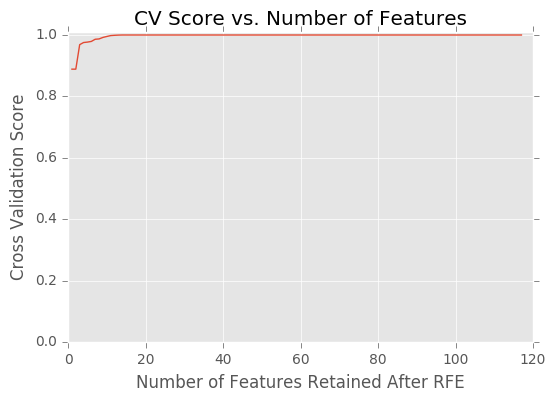

In [25]:
print(selector.grid_scores_)

# Initialize figure and axes:
fig, ax = plt.subplots()
ax.plot(np.arange(len(selector.grid_scores_))+1,selector.grid_scores_)
xlim = ax.set_xlim([0,120])
ylim = ax.set_ylim([0,1.01])
xlab = ax.set_xlabel('Number of Features Retained After RFE')
ylab = ax.set_ylabel('Cross Validation Score')
titl = ax.set_title('CV Score vs. Number of Features')

It turns out with this problem, we're in a bit of a funny edge case for `RFECV`. The `RandomForestClassifier` works so well that every model containg from 14 features up to 117 features gets a perfect cross-validation score! Most prediction problems would not be able to achieve a perfect cross-validation score even once, but the mushroom data set is a little too well-behaved. Ideally, in the event of a cross-validation score tie, we would want `RFECV` (a tool used for dimensionality reduction) to select the *fewest* number of features, and not the greatest. As of `sklearn` version 0.18.1, `RFECV` selects the model with the greatest number of features in the event of a tie -- hopefully this will be fixed in a later version.

Anyway, not all is lost. We saw above, looking at the `grid_scores_` attribute, that we can prune the data set down to 14 features and still get optimal predictive power. **Run** the cell below to create a [parsimonious](https://www.merriam-webster.com/dictionary/parsimonious) `RandomForestClassifier()` for the mushroom data set, and confirm that the accuracy scores on both the training and testing sets are optimal. 

In [26]:
# Number of features at which to cease RFE
n_feat = 14

# Number of features to remove at each step of RFE
step = 1

print("Creating a Random Forest Classifier")
print("  RFE, removing {} feature(s) at a time, until reaching {} features."\
      .format(step,n_feat))

# Keep track of elapsed time to recursively eliminate
# all but n_feat features:
t0 = time()

# Create a Random Forest classifier with 10 trees in the forest
clf = RandomForestClassifierWithCoef(n_estimators=10, max_depth=None,\
                                    min_samples_split=2, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(\
            X, y, test_size=0.20, random_state=0)

# Create a RFE selector, using the Random Forest classifier as the estimator
selector = RFE(clf, n_features_to_select=n_feat, step=step)

# Fit the RFE selector (this is the time-intensive step)
selector = selector.fit(X_train, y_train)

# Print out the elapsed time for RFE
print("  ...done in {:0.3f}s".format(time() - t0))

# Get the names of the features remaining after RFE
RFE_best_features = X.columns[selector.support_]

# Display the accuracy score on the test set
print("Training set accuracy: {:.2f}%".format(\
    accuracy_score(y_train, selector.estimator_.predict(X_train[RFE_best_features]))*100.0))

# Display the accuracy score on the test set
print("Testing set accuracy: {:.2f}%".format(\
    accuracy_score(y_test, selector.estimator_.predict(X_test[RFE_best_features]))*100.0))

Creating a Random Forest Classifier
  RFE, removing 1 feature(s) at a time, until reaching 14 features.
  ...done in 5.373s
Training set accuracy: 100.00%
Testing set accuracy: 100.00%


## Feature Selection - Recap

So what feature selection techniques did we cover in this notebook?

We learned about **univariate feature selection** and `SelectKBest()`. Univariate feature selection seems to be a computationally inexpensive way to pare down the dimensionality of a data set, but at the expense of missing out on features that work well in tandem. We needed a score function to determine the predictive power of each feature. For classification problems, we learned about the **Chi-Squared** $(\chi^2)$ test statistic, which is one possible score function for `SelectKBest()`. As the value of $\chi^2$ increases for a pair of features, it becomes less likely that the two features are independent.

We also learned about two ways to approach **recursive feature elimination**: `RFE()` and `RFECV()`. With the former (`RFE`), you need to prescribe *a priori* the number of features you'd like to retain for the final model. With the latter, cross-validation scores are used to rank each number of features, and the final model will have a number of features that maximizes the cross-validation score. We saw that it's important that the fit estimator have some `coef_` attribute that contains a value for each feature, increasing with increasing feature importance. We also saw that RFE is a bit more computationally expensive than univariate feature selection. However, RFE generally yields better results than univariate feature selection for the same number of features, because RFE can capture more complex relationships (think XOR operator).

For further reading on feature selection, you could check out the `sklearn.feature_selection` [userguide](http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) and [API](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection), [this example](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html) of `RFE` from the `sklearn` documentation, and [this blogpost from machinelearningmastery](http://machinelearningmastery.com/feature-selection-machine-learning-python/).

In addition to feature selection, you may also use **feature transformation** to reduce the dimensionality of a dataset, including Principal Component Analysis (PCA) which we discussed in lesson-06-part-02.